## Installing Packages

In [59]:
from hashlib import sha1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import missingno as msno

## Reading Dataset

In [60]:
df = pd.read_csv("data/data.csv")

In [61]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [62]:
df.tail()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
904961,for_sale,2.0,2.0,NaN,New York City,New York,10463.0,NaN,2021-08-13,359000.0
904962,for_sale,2.0,2.0,NaN,Bronx,New York,10463.0,1200.0,NaN,299000.0
904963,for_sale,NaN,1.0,NaN,Bronx,New York,10463.0,NaN,NaN,120000.0
904964,for_sale,3.0,2.0,NaN,Bronx,New York,10463.0,NaN,NaN,449000.0
904965,for_sale,3.0,3.0,NaN,New York City,New York,10463.0,1677.0,2007-06-27,850000.0


## Preliminary Analysis

In [63]:
train_df, test_df = train_test_split(df, test_size=0.6, random_state=123)

In [64]:
train_df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
337857,for_sale,7.0,10.0,519.09,Braintree,Vermont,5060.0,NaN,NaN,1800000.0
733358,for_sale,4.0,5.0,1.89,Green Brook,New Jersey,8812.0,NaN,NaN,1100000.0
499414,for_sale,2.0,2.0,0.08,Middlesex,New Jersey,8846.0,NaN,2001-03-26,305000.0
2639,for_sale,5.0,3.0,0.61,Vega Alta,Puerto Rico,692.0,1400.0,NaN,100000.0
477954,for_sale,1.0,1.0,NaN,New York City,New York,10010.0,1000.0,2015-04-29,2500000.0


In [65]:
train_df.shape

(361986, 10)

In [66]:
train_df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,310071.000000,316593.000000,254999.000000,361900.000000,2.451260e+05,3.619520e+05
mean,3.326745,2.480791,19.188520,6518.686270,2.141177e+03,8.818534e+05
std,2.012401,1.788993,1061.235901,3813.242663,3.718059e+03,2.787061e+06
min,1.000000,1.000000,0.000000,601.000000,1.000000e+02,0.000000e+00
25%,2.000000,1.000000,0.110000,2908.000000,1.133000e+03,2.690000e+05
50%,3.000000,2.000000,0.290000,6810.000000,1.652000e+03,4.750000e+05
75%,4.000000,3.000000,1.150000,8854.000000,2.500000e+03,8.350000e+05
max,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06,8.750000e+08


In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361986 entries, 337857 to 773630
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   status          361986 non-null  object 
 1   bed             310071 non-null  float64
 2   bath            316593 non-null  float64
 3   acre_lot        254999 non-null  float64
 4   city            361960 non-null  object 
 5   state           361986 non-null  object 
 6   zip_code        361900 non-null  float64
 7   house_size      245126 non-null  float64
 8   prev_sold_date  178219 non-null  object 
 9   price           361952 non-null  float64
dtypes: float64(6), object(4)
memory usage: 30.4+ MB


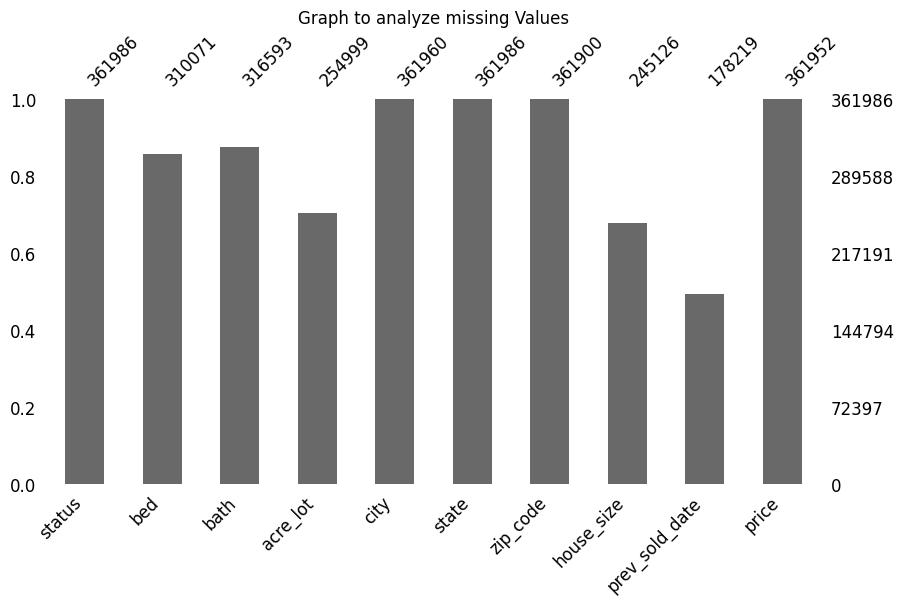

In [68]:
msno.bar(train_df,figsize=(10,5), fontsize=12)
plt.title("Graph to analyze missing Values")
plt.show()

Now, it wouldn't make sense to study the housing prices in various cities if the city name has not been included

In [69]:
train_df_updated = train_df.dropna(subset = "city")

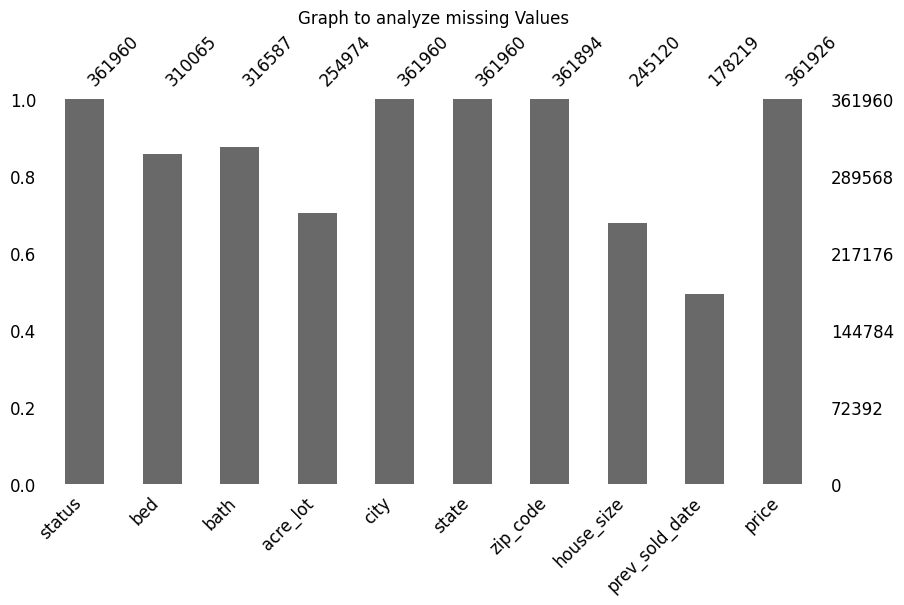

In [70]:
msno.bar(train_df_updated,figsize=(10,5), fontsize=12)
plt.title("Graph to analyze missing Values")
plt.show()

Again, we need the price for the house in order to analyze the pricing trends

In [71]:
train_df_updated = train_df_updated.dropna(subset="price")

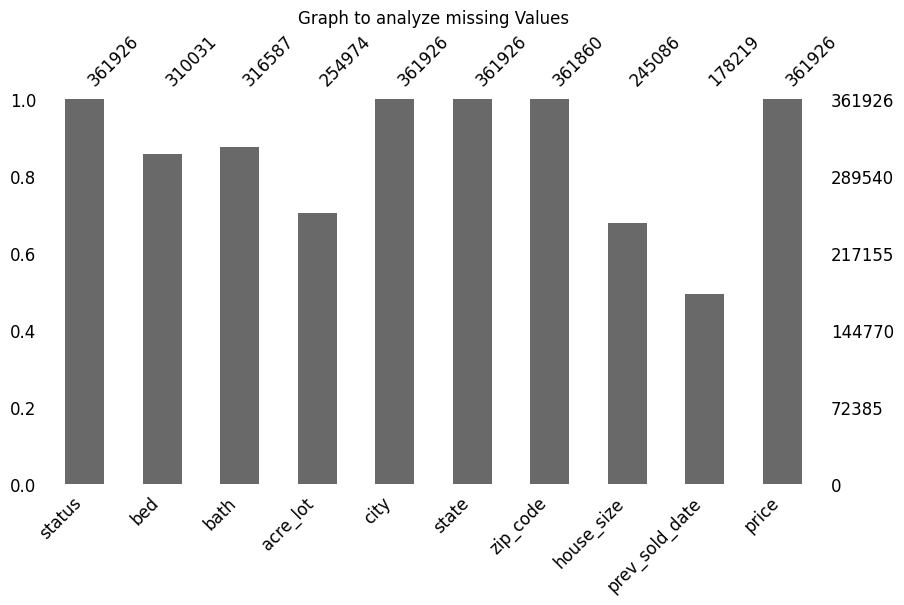

In [72]:
msno.bar(train_df_updated,figsize=(10,5), fontsize=12)
plt.title("Graph to analyze missing Values")
plt.show()

### Cleaning the Data

In [73]:
train_df_cleaning = train_df.copy()

In [74]:
train_df_cleaning = train_df_cleaning.drop(["zip_code","status"],axis = 1)

In [75]:
train_df_cleaning['new_house'] = train_df['prev_sold_date'].isnull().astype(int)

<Axes: >

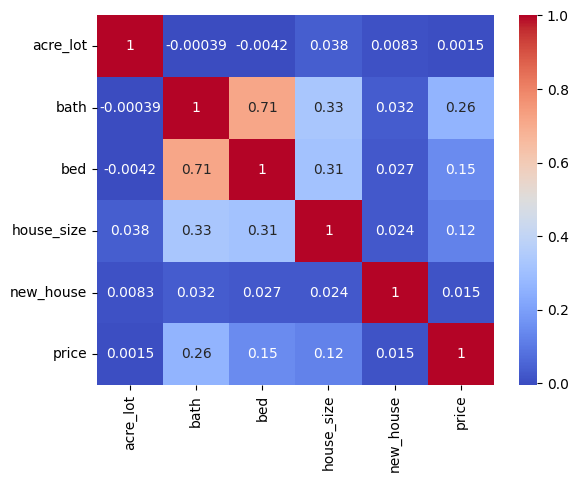

In [76]:
columns_to_exclude = ['city','state','prev_sold_date']
corr_mx = train_df_cleaning[train_df_cleaning.columns.difference(columns_to_exclude)].corr()
sns.heatmap(corr_mx, annot = True, cmap = 'coolwarm')

In [83]:
train_df_cleaning.isnull().sum()

bed                51915
bath               45393
acre_lot          106987
city                  26
state                  0
house_size        116860
prev_sold_date    183767
price                 34
new_house              0
dtype: int64

In [84]:
train_df.isnull().sum()

status                 0
bed                51915
bath               45393
acre_lot          106987
city                  26
state                  0
zip_code              86
house_size        116860
prev_sold_date    183767
price                 34
dtype: int64

In [85]:
train_df.sort_index()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
5,for_sale,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,NaN,179000.0
7,for_sale,3.0,2.0,0.08,Ponce,Puerto Rico,731.0,1050.0,NaN,71600.0
8,for_sale,2.0,1.0,0.09,Ponce,Puerto Rico,730.0,1092.0,NaN,100000.0
...,...,...,...,...,...,...,...,...,...,...
904954,for_sale,1.0,1.0,NaN,New York City,New York,10463.0,NaN,NaN,200000.0
904955,for_sale,1.0,1.0,NaN,New York City,New York,10463.0,800.0,NaN,225000.0
904958,for_sale,1.0,1.0,NaN,Bronx,New York,10463.0,700.0,NaN,245000.0
904959,for_sale,1.0,1.0,NaN,New York City,New York,10463.0,720.0,2022-04-01,265000.0


In [87]:
real_estate_summary = train_df.describe(include = 'all')
real_estate_summary

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
count,361986,310071.000000,316593.000000,254999.000000,361960,361986,361900.000000,2.451260e+05,178219,3.619520e+05
unique,2,NaN,NaN,NaN,2392,18,NaN,NaN,9466,NaN
top,for_sale,NaN,NaN,NaN,New York City,New Jersey,NaN,NaN,2018-07-25,NaN
freq,361331,NaN,NaN,NaN,19069,92800,NaN,NaN,125,NaN
mean,NaN,3.326745,2.480791,19.188520,NaN,NaN,6518.686270,2.141177e+03,NaN,8.818534e+05
std,NaN,2.012401,1.788993,1061.235901,NaN,NaN,3813.242663,3.718059e+03,NaN,2.787061e+06
min,NaN,1.000000,1.000000,0.000000,NaN,NaN,601.000000,1.000000e+02,NaN,0.000000e+00
25%,NaN,2.000000,1.000000,0.110000,NaN,NaN,2908.000000,1.133000e+03,NaN,2.690000e+05
50%,NaN,3.000000,2.000000,0.290000,NaN,NaN,6810.000000,1.652000e+03,NaN,4.750000e+05
75%,NaN,4.000000,3.000000,1.150000,NaN,NaN,8854.000000,2.500000e+03,NaN,8.350000e+05


In [93]:
missing_vals_cols = []
numeric_cols = []
n = train_df.shape[0]
for x in real_estate_summary:
    if real_estate_summary[str(x)]["count"] < n:
        missing_vals_cols.append(str(x))
    if type(real_estate_summary[str(x)]["max"]) == np.float64:
        numeric_cols.append(str(x))
missing_vals_cols
numeric_cols

['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'price']

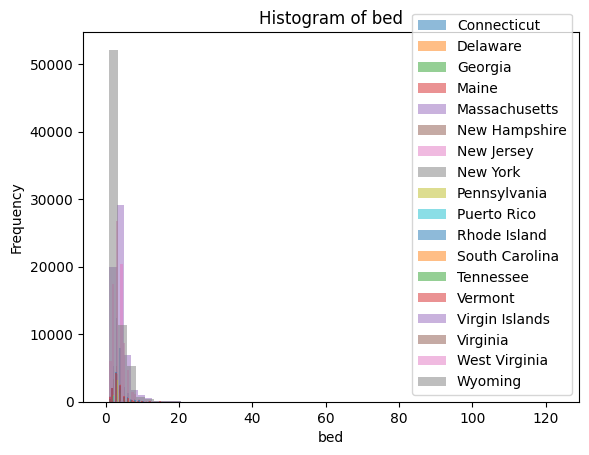

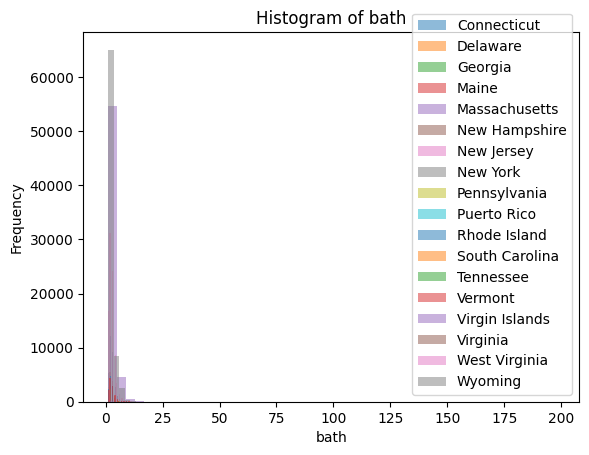

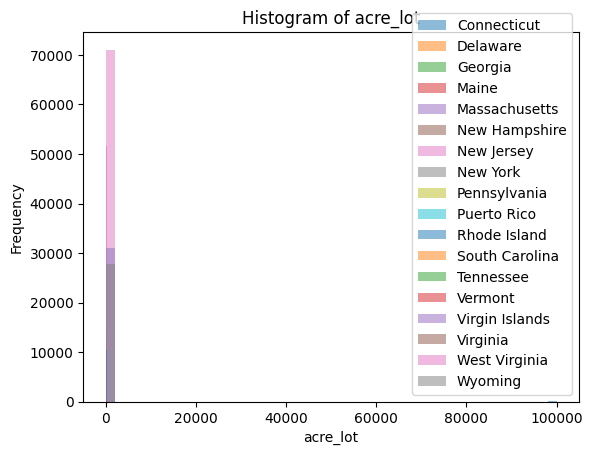

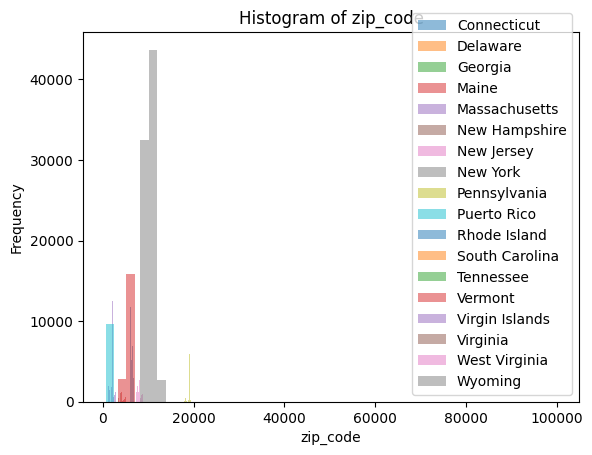

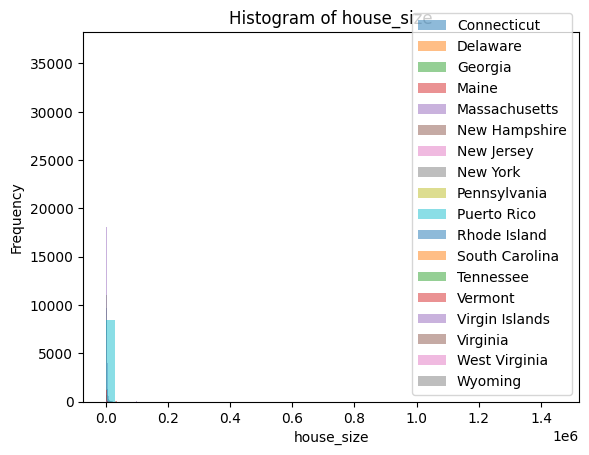

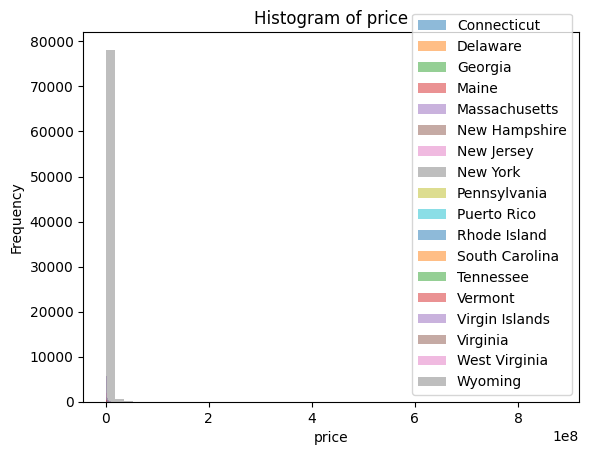

In [97]:
for x in numeric_cols:
    ax = train_df.groupby("state")[x].plot.hist(bins=50, alpha=0.5, legend=True)
    plt.xlabel(x)
    plt.title("Histogram of " + x)
    plt.show()